# BRAIN TUMOR CLASSIFICATION USING MRI IMAGES

## OBJECTIVE
  The Objective of this study is to Classify tumor in the brain using the MRI images took from the patients. For this image classification I am using different methods in CNN architectures. By the study classifing the tomur in brain becomes lot easier without the human intervention. The future scope of this study may go to monitoring the tumor size for specific patient and anaysing the medicines impact whether its working or Not, is it slowing the tumor cells or not. Implementing newer technologies in medical field improves the overall health of the humans significantly.

# Dataset:

  This Dataset contains images of MRI scans of 3 different types of Brain tumors and images of no brain tumor. Totally 3264 images containing four different classes stated as 'glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor'. glioma_tumor, meningioma_tumor, pituitary_tumor are the three tumors i am trying to classify.

## **glioma tumor** 
  glioma is a tumor that forms in the brain or spinal cord. There are several types, including astrocytomas, ependymomas and oligodendrogliomas. Gliomas can affect children or adults. Some grow very quickly. Most people with gliomas need a combination of treatments such as surgery, radiation therapy and chemotherapy.
## **meningioma tumor**
  A meningioma is a tumor that arises from the meninges — the membranes that surround the brain and spinal cord. Although not technically a brain tumor, it is included in this category because it may compress or squeeze the adjacent brain, nerves and vessels. Meningioma is the most common type of tumor that forms in the head.
## **pituitary tumor**
  Pituitary tumors are abnormal growths that develop in your pituitary gland. Some pituitary tumors result in too much of the hormones that regulate important functions of your body. Some pituitary tumors can cause your pituitary gland to produce lower levels of hormones.

# MODEL 1

  In first model i have built an architecture that i have seen on online, this contains sequencial layers of 2 con2D layers with kernal size of 3,3 and maxpooling layer below each. After that flatten is used to flatout. Now 3 dense layer of 32, 16, 8 consecutively, with "relu" activation layer. lastly the final layer of "softmax" for output.

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from tensorflow.keras import models,layers
from keras.layers import Dropout, Input, Softmax, RandomFlip,Dense, Conv2D, GlobalAveragePooling2D
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt

In [ ]:
batch = 32
imagesiz = 256
channels=3
epochs=50

In [ ]:
data_dir="/content/drive/MyDrive/cnndata/Training"
test_data="/content/drive/MyDrive/cnndata/Testing"

train_data = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/cnndata/Training",
    seed=123,
    validation_split=0.2
    subset="training"
    shuffle=True,
    image_size=(imagesiz,imagesiz),
    batch_size=batch
)

In [ ]:
train_data = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  shuffle=True,
  image_size=(imagesiz, imagesiz),
  batch_size=batch)

Found 2870 files belonging to 4 classes.
Using 2296 files for training.


In [ ]:
val_data = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  shuffle=True,
  image_size=(imagesiz, imagesiz),
  batch_size=batch)

Found 2870 files belonging to 4 classes.
Using 574 files for validation.


In [ ]:
test_data = tf.keras.utils.image_dataset_from_directory(
  test_data,
  seed=123,
  shuffle=True,
  image_size=(imagesiz, imagesiz),
  batch_size= batch)

In [ ]:
class_names=train_data.class_names
class_names

['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

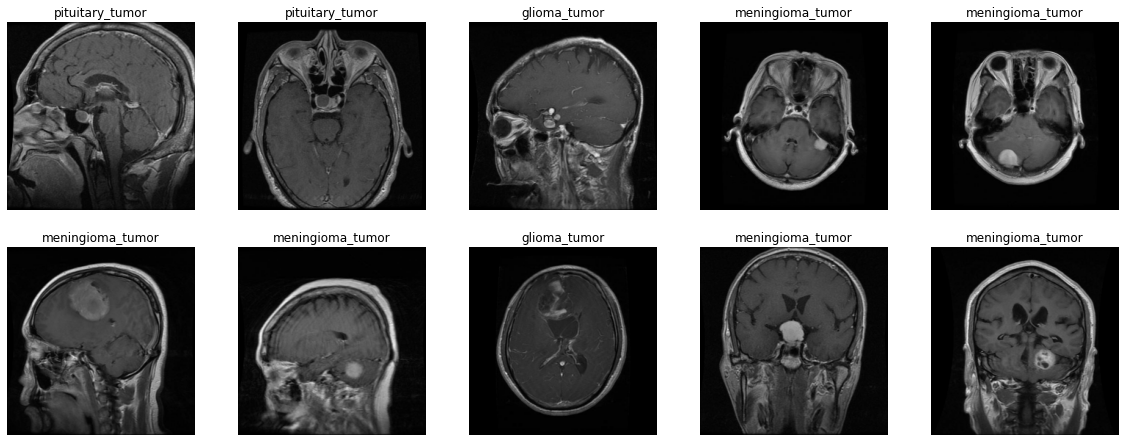

In [ ]:
plt.figure(figsize=(20, 20))
for images, labels in train_data.take(1):
  for i in range(10):
    ax = plt.subplot(5, 5, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

# Image cleaning and Feature engineering

  The MRI images are ready to use for feature engineering. the images are standardly scaled in 256/256 pixels. to avoid overfitting and work best towards unseen image, image augumentation is done. the images are randomly fliped horizontally and vertically then they are randomly rotated sideways.

#### Cache, Shuffle, and Prefetch the Dataset

In [ ]:
train_data = train_data.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_data = val_data.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_data = test_data.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

#### Resizing and rescaling

In [ ]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(imagesiz, imagesiz),
  layers.experimental.preprocessing.Rescaling(1./255),
])

#### Data augumentation

In [ ]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [ ]:
train_data = train_data.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
input_shape = (batch, imagesiz, imagesiz, channels)
n_classes = len(class_names)

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(50, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(50,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    #layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 50)        1400      
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 50)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 50)        22550     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 50)         0         
 2D)                                                  

Fitting

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.3, patience = 3, 
                              min_delta = 0.01, mode = 'auto', verbose = 1)

In [ ]:
history = model.fit(
    train_data,
    batch_size=batch,
    validation_data=val_data,
    callbacks = [reduce_lr],
    verbose=1,
    epochs=20,
)

Epoch 1/20
72/72 [==============================] - 19s 269ms/step - loss: 0.2994 - accuracy: 0.8811 - val_loss: 0.4911 - val_accuracy: 0.8449 - lr: 0.0010
Epoch 2/20
72/72 [==============================] - 24s 329ms/step - loss: 0.2893 - accuracy: 0.8837 - val_loss: 0.4342 - val_accuracy: 0.8589 - lr: 0.0010
Epoch 3/20
72/72 [==============================] - 22s 303ms/step - loss: 0.2806 - accuracy: 0.8920 - val_loss: 0.4345 - val_accuracy: 0.8693 - lr: 0.0010
Epoch 4/20
72/72 [==============================] - 25s 338ms/step - loss: 0.3146 - accuracy: 0.8807 - val_loss: 0.4512 - val_accuracy: 0.8415 - lr: 0.0010
Epoch 5/20
72/72 [==============================] - ETA: 0s - loss: 0.2989 - accuracy: 0.8737
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
72/72 [==============================] - 20s 270ms/step - loss: 0.2989 - accuracy: 0.8737 - val_loss: 0.5020 - val_accuracy: 0.8380 - lr: 0.0010
Epoch 6/20
72/72 [==============================] - 23s 315ms

In [ ]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 287}

### Result
accuracy on the train images: 0.9168  
accuracy on validation images: 0.8711

using this model to predict test image i got 232 images correctly classified, 162 wrongly classified out of 394 total images. 

# model 2

EfficientnetB0 is what used to build 2nd model. This function has Keras image classification model, optionally loaded with weights pre-trained on ImageNet. i chose this because seen online some people using this pre trained model to work with this image data and gave good results too.After efficientnetV2B0 in the sequence, used GlobalAveragepooling, dropout of 0.5, dense layer of 8 nodes with "relu", and finally dense layer with the softmax layer of 4 classes.

In [ ]:
from keras.applications import EfficientNetB0
from keras.layers import Dense, Conv2D, GlobalAveragePooling2D
from tensorflow.keras.callbacks import ReduceLROnPlateau
from keras.layers import Dropout, Input, Softmax, RandomFlip

In [ ]:
def create_model(dropout_rate = 0.5, flip_mode = None, lr = 0.001,input_shape=input_shape):
    model = Sequential()
    model.add(Input(shape = input_shape))
    
    if(flip_mode != None):
        model.add(layers.experimental.preprocessing.RandomFlip(flip_mode))
    #model.add(resize_and_rescale)

    model.add(EfficientNetB0(weights = 'imagenet', include_top = False,input_shape=input_shape))

    model.add(layers.GlobalAveragePooling2D())
    model.add(layers.Dropout(dropout_rate))
    model.add(Dense(4, activation = 'softmax'))

    model.build()
    model.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics = ['accuracy'])
    
    return model

In [ ]:
model1 = Sequential()
model1.add(Input(shape = (imagesiz, imagesiz, channels)))
#model1.add(data_augmentation)

model1.add(tf.keras.applications.EfficientNetB0(weights = 'imagenet', include_top = False))

model1.add(GlobalAveragePooling2D())
model1.add(Dropout(0.5))
model1.add(Dense(8, activation = 'relu'))
model1.add(Dense(4, activation = 'softmax'))

model1.build()
model1.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001), loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics = ['accuracy'])

16705208/16705208 [==============================] - 1s 0us/step


In [ ]:
model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense_4 (Dense)             (None, 8)                 10248     
                                                                 
 dense_5 (Dense)             (None, 4)                 36        
                                                                 
Total params: 4,059,855
Trainable params: 4,017,832
Non-trainable params: 42,023
_______________________________________

In [ ]:
reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.3, patience = 3, 
                              min_delta = 0.01, mode = 'auto', verbose = 1)
earlystop=EarlyStopping(monitor='val_accuracy',min_delta=0,patience=3,verbose=1,mode='auto',baseline=None,restore_best_weights=False)

In [ ]:
history1 = model1.fit(train_data, validation_data = val_data,
                    epochs = 5, batch_size = 32, callbacks = [reduce_lr], verbose=1)

Epoch 1/5
72/72 [==============================] - 45s 624ms/step - loss: 0.0068 - accuracy: 0.9987 - val_loss: 0.0852 - val_accuracy: 0.9721 - lr: 2.7000e-05
Epoch 2/5
72/72 [==============================] - 45s 630ms/step - loss: 0.0070 - accuracy: 0.9983 - val_loss: 0.0927 - val_accuracy: 0.9704 - lr: 2.7000e-05
Epoch 3/5
72/72 [==============================] - 47s 647ms/step - loss: 0.0061 - accuracy: 0.9987 - val_loss: 0.0947 - val_accuracy: 0.9704 - lr: 2.7000e-05
Epoch 4/5
72/72 [==============================] - ETA: 0s - loss: 0.0048 - accuracy: 0.9987
Epoch 4: ReduceLROnPlateau reducing learning rate to 8.100000013655517e-06.
72/72 [==============================] - 45s 630ms/step - loss: 0.0048 - accuracy: 0.9987 - val_loss: 0.0944 - val_accuracy: 0.9704 - lr: 2.7000e-05
Epoch 5/5
72/72 [==============================] - 46s 641ms/step - loss: 0.0052 - accuracy: 0.9996 - val_loss: 0.0943 - val_accuracy: 0.9704 - lr: 8.1000e-06


### Result

accuracy on the train images: 0.9996  
accuracy on validation images: 0.9704

using this model to predict test image i got 303 images correctly classified, 91 wrongly classified out of 394 total images. 

In [ ]:
model1.save('/content/drive/MyDrive/cnndata/cnnmodel1')

# model 3

After seen the results of EfficientnetB0 i am soo curious to try the other EfficientNet versions so i went with EfficientNet version 2 B0. This also weights pre-trained on ImageNet and also with bigger size. In the sequence after efficientnetV2B0 used GlobalAveragepooling, dropout of 0.5, dense layer of 8 nodes with "relu", and finally the softmax layer of no of classes.

In [ ]:
efv2=tf.keras.applications.efficientnet_v2.EfficientNetV2B0(
    include_top=False,
    weights='imagenet',
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation='softmax',
    include_preprocessing=True
)

24274472/24274472 [==============================] - 1s 0us/step


In [ ]:
model2 = Sequential()
model2.add(Input(shape = (imagesiz, imagesiz, channels)))
#model1.add(data_augmentation)

model2.add(efv2)

model2.add(GlobalAveragePooling2D())
model2.add(Dropout(0.5))
model2.add(Dense(8, activation = 'relu'))
model2.add(Dense(4, activation = 'softmax'))

model2.build()
model2.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001), loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics = ['accuracy'])

In [ ]:
model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetv2-b0 (Function  (None, None, None, 1280)  5919312  
 al)                                                             
                                                                 
 global_average_pooling2d_1   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_1 (Dropout)         (None, 1280)              0         
                                                                 
 dense_6 (Dense)             (None, 8)                 10248     
                                                                 
 dense_7 (Dense)             (None, 4)                 36        
                                                                 
Total params: 5,929,596
Trainable params: 5,868,988
No

In [ ]:
reduce_lr2 = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.3, patience = 2, 
                              min_delta = 0.01, mode = 'auto', verbose = 1)
earlystop2=EarlyStopping(monitor='val_loss',min_delta=0,patience=2,verbose=1,mode='auto',baseline=None,restore_best_weights=False)

In [ ]:
history2 = model2.fit(train_data, validation_data = val_data,
                    epochs = 10, batch_size = 32, callbacks = [reduce_lr2], verbose=1)

Epoch 1/10
72/72 [==============================] - 35s 482ms/step - loss: 0.0127 - accuracy: 0.9961 - val_loss: 0.1467 - val_accuracy: 0.9547 - lr: 1.9683e-08
Epoch 2/10
72/72 [==============================] - 31s 434ms/step - loss: 0.0153 - accuracy: 0.9961 - val_loss: 0.1280 - val_accuracy: 0.9652 - lr: 1.9683e-08
Epoch 3/10
72/72 [==============================] - 32s 443ms/step - loss: 0.0160 - accuracy: 0.9939 - val_loss: 0.1451 - val_accuracy: 0.9599 - lr: 1.9683e-08
Epoch 4/10
72/72 [==============================] - ETA: 0s - loss: 0.0123 - accuracy: 0.9974
Epoch 4: ReduceLROnPlateau reducing learning rate to 5.904900035602622e-09.
72/72 [==============================] - 32s 446ms/step - loss: 0.0123 - accuracy: 0.9974 - val_loss: 0.1344 - val_accuracy: 0.9599 - lr: 1.9683e-08
Epoch 5/10
72/72 [==============================] - 32s 442ms/step - loss: 0.0133 - accuracy: 0.9974 - val_loss: 0.1372 - val_accuracy: 0.9634 - lr: 5.9049e-09
Epoch 6/10
72/72 [=======================

In [ ]:
model2.save('/content/drive/MyDrive/cnndata/cnnmodel2')

### Result

accuracy on the train images: 0.9952  
accuracy on validation images: 0.9617

using this model to predict test image i got 283 images correctly classified, 111 wrongly classified out of 394 total images. less than the Efficientnet Version 1.

### Visualizing the Train, Validation images accuracy and Loss

In [ ]:
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']

loss = history1.history['loss']
val_loss = history1.history['val_loss']

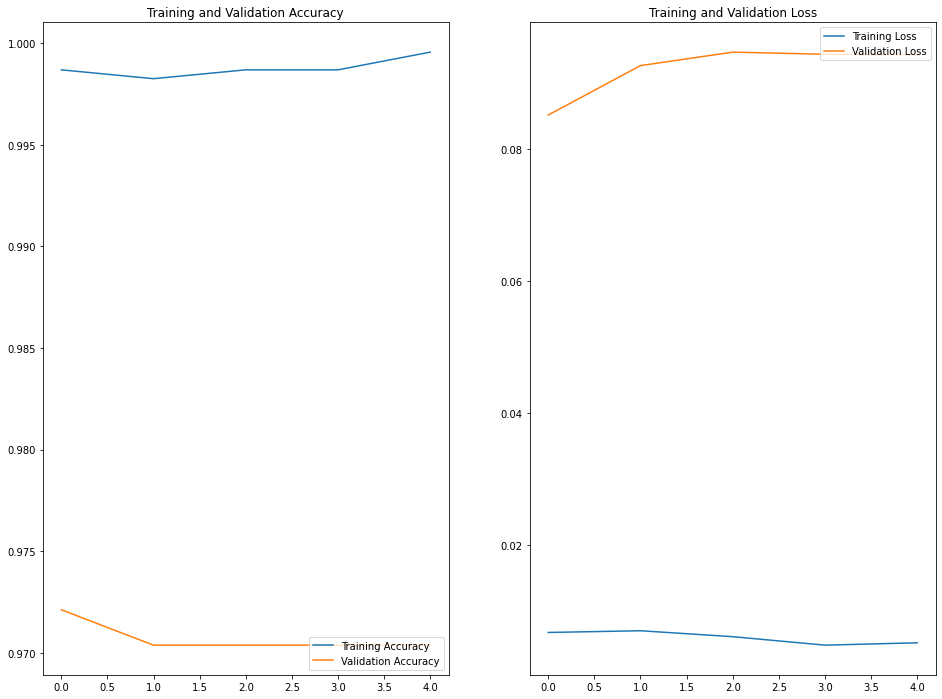

In [ ]:
plt.figure(figsize=(16, 12))
plt.subplot(1, 2, 1)
plt.plot(range(5), acc, label='Training Accuracy')
plt.plot(range(5), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(5), loss, label='Training Loss')
plt.plot(range(5), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Testing on the images from Test dataset

In [ ]:
ts=test_data

In [ ]:
import numpy as np
c=0
a=0
for images_batch, labels_batch in ts:
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    #print("first image to predict")
    #plt.imshow(first_image)
    actual_label=class_names[first_label]
    
    batch_prediction = model2.predict(images_batch)
    predicted_label=class_names[np.argmax(batch_prediction[0])]
    if(actual_label==predicted_label):
      c=c+1
    else:
      a=a+1
print(c,a,c+a)
                                          

## Results

### _Model 1 predicted_
232 images correct and 162 incorrect out of 394
### _With model 2 got upto_
303 images correct and 91 incorrect out of 394
### _On model 3_
283 images correct and 111 incorrect out of 394

# Recommended model

Second model, EfficientNetB0 model gives better Accuracy and cross val accuracy score. So for now second model bestfits for this image data. And also while running the test image set on the second "efficientnetB0" model provides precise classification much better then any other two models, correctly classifies upto 303 classes out of 394 better then other 232 and 283. Since classification is the main objective i choose this second model as successor.

# Insights

while testing the models, all of them have some difficulties to classify between "no tumor" and "Glioma tumor" and "pituitary tumor" this may be because of the location of the tumor in the brain.


In further, as always more images will help to get more accurate classification. And exploring the pre trained models more will improve results in long run.

since building own model requires more trail and error, it also not an Bad option.
